In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp "/content/gdrive/My Drive/Urdu_mnist/dataset.zip" "/content/"

In [0]:
!cp "/content/gdrive/My Drive/Urdu_mnist/test_dataset.zip" "/content"

In [32]:
!unzip "/content/test_dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: content/test_dataset/digit_2/writer659_pass04_digit2.bmp  
  inflating: content/test_dataset/digit_2/writer609_pass08_digit2.bmp  
  inflating: content/test_dataset/digit_2/writer644_pass01_digit2.bmp  
  inflating: content/test_dataset/digit_2/writer611_pass04_digit2.bmp  
  inflating: content/test_dataset/digit_2/writer646_pass05_digit2.bmp  
  inflating: content/test_dataset/digit_2/writer662_pass10_digit2.bmp  
  inflating: content/test_dataset/digit_2/writer629_pass03_digit2.bmp  
  inflating: content/test_dataset/digit_2/writer649_pass01_digit2.bmp  
  inflating: content/test_dataset/digit_2/writer692_pass08_digit2.bmp  
  inflating: content/test_dataset/digit_2/writer617_pass10_digit2.bmp  
  inflating: content/test_dataset/digit_2/writer677_pass04_digit2.bmp  
  inflating: content/test_dataset/digit_2/writer646_pass02_digit2.bmp  
  inflating: content/test_dataset/digit_2/writer699_pass10_digit2.bmp  
  inflating: 

In [4]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt 
import sklearn
import imutils 
import os 
import numpy as np
from IPython.display import Image, display
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import  np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers import Conv2D,MaxPool2D,ZeroPadding2D,Convolution2D,MaxPooling2D
from keras import backend as K
from keras.layers import BatchNormalization
from keras.optimizers import SGD,RMSprop

Using TensorFlow backend.


In [5]:
digit_0=os.listdir("/content/content/dataset/digit_0")
digit_1=os.listdir("/content/content/dataset/digit_1")
digit_2=os.listdir("/content/content/dataset/digit_2")
digit_3=os.listdir("/content/content/dataset/digit_3")
digit_4=os.listdir("/content/content/dataset/digit_4")
digit_5=os.listdir("/content/content/dataset/digit_5")
digit_6=os.listdir("/content/content/dataset/digit_6")
digit_7=os.listdir("/content/content/dataset/digit_7")
digit_8=os.listdir("/content/content/dataset/digit_8")
digit_9=os.listdir("/content/content/dataset/digit_9")

plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

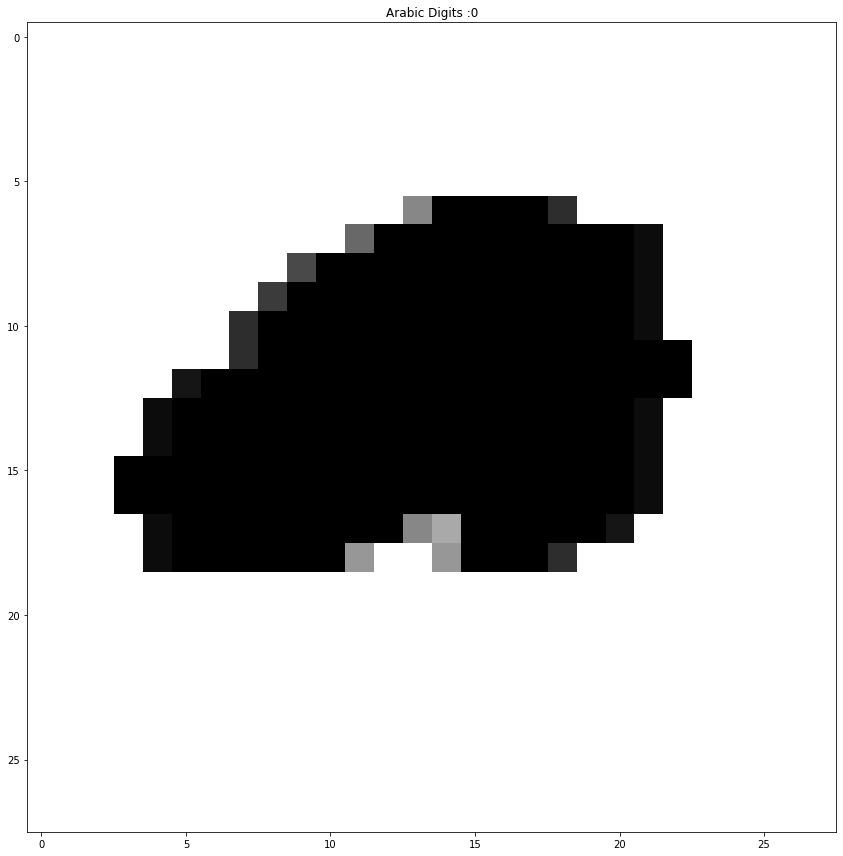

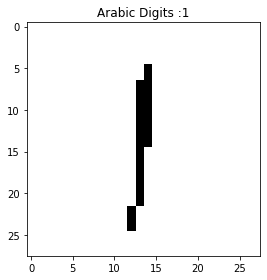

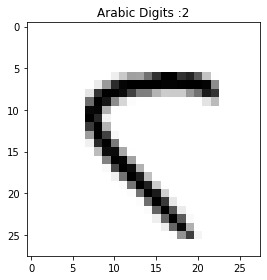

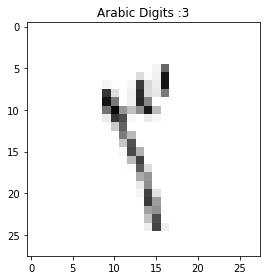

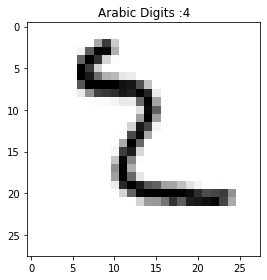

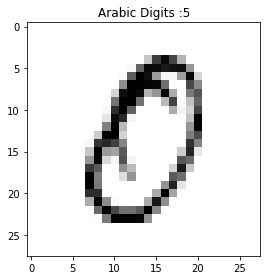

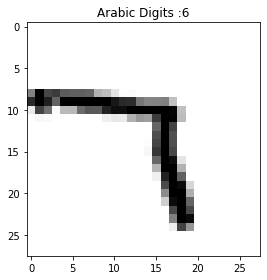

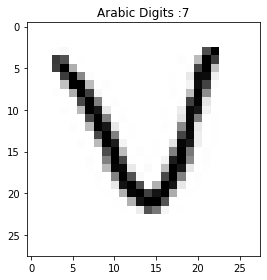

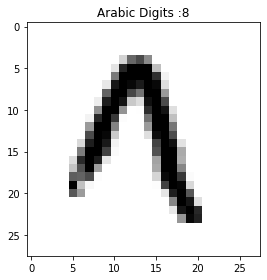

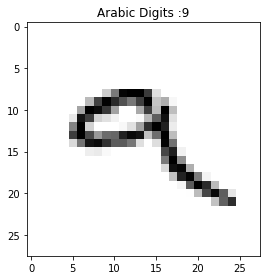

In [93]:
plt.figure(figsize=(12,12))
l=[digit_0,digit_1,digit_2,digit_3,digit_4,digit_5,digit_6,digit_7,digit_8,digit_9]
for j in range(10):
  a=l[j]
  for i in range(4):
      plt.plot()
      img=cv2.imread('/content/content/dataset/digit_' + str(j)+"/" + a[i])
      plt.imshow(img)
      plt.title('Arabic Digits :' + str(j))
      plt.tight_layout()
  plt.show()

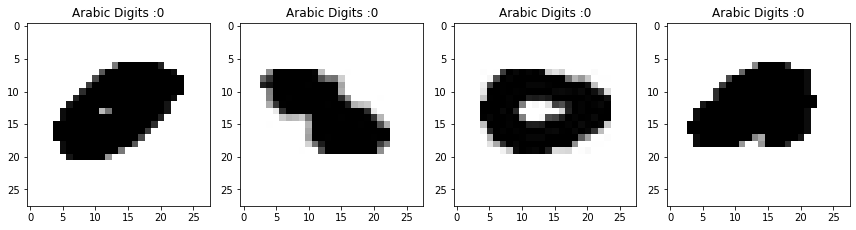

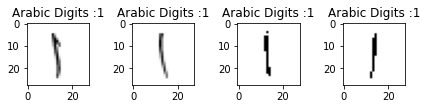

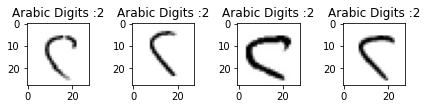

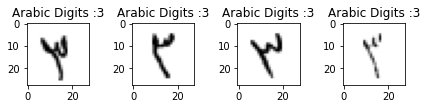

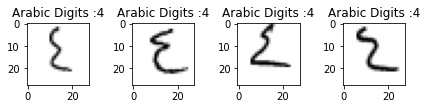

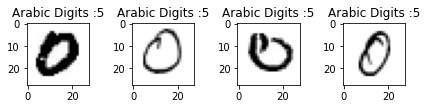

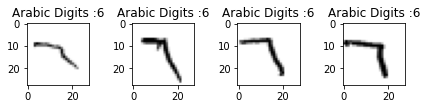

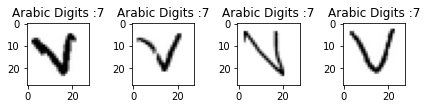

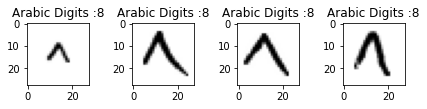

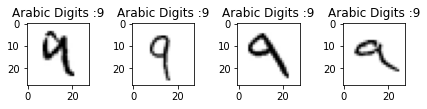

In [10]:
plt.figure(figsize=(12,12))
l=[digit_0,digit_1,digit_2,digit_3,digit_4,digit_5,digit_6,digit_7,digit_8,digit_9]
for j in range(10):
  a=l[j]
  for i in range(4):
      plt.subplot(1,4,i+1)
      img=cv2.imread('/content/content/dataset/digit_' + str(j)+"/" + a[i])
      plt.imshow(img)
      plt.title('Arabic Digits :' + str(j))
      plt.tight_layout()
  plt.show()

In [0]:
data=[]
labels=[]
for j in range(10):
  for i in range(len(l[j])):
        img=cv2.imread('/content/content/dataset/digit_' + str(j)+"/" + l[j][i])
        img_resize=cv2.resize(img,(28,28))
        img_gray=cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
        img_array=img_to_array(img_gray)
        data.append(img_array)
        labels.append(j)


In [0]:
image_data=np.array(data)
labels=np.array(labels)

In [0]:
idx=np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data=image_data[idx]
labels=labels[idx]

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(image_data,labels,test_size=0.4, random_state=101)

In [0]:
y_train=np_utils.to_categorical(y_train,num_classes=10)
y_test=np_utils.to_categorical(y_test,num_classes=10)

In [0]:
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=RMSprop(),metrics=['accuracy'], loss="categorical_crossentropy")



In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 5, 5, 64)          256       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)        

In [46]:
history=model.fit(X_train,y_train,epochs=20,batch_size=32, validation_data=(X_test,y_test))

Train on 36000 samples, validate on 24000 samples
Epoch 1/20
36000/36000 [==============================] - 20s 548us/step - loss: 0.0812 - accuracy: 0.9770 - val_loss: 0.0677 - val_accuracy: 0.9802
Epoch 2/20
36000/36000 [==============================] - 13s 360us/step - loss: 0.0374 - accuracy: 0.9892 - val_loss: 0.0578 - val_accuracy: 0.9828
Epoch 3/20
36000/36000 [==============================] - 13s 370us/step - loss: 0.0275 - accuracy: 0.9922 - val_loss: 0.0612 - val_accuracy: 0.9866
Epoch 4/20
36000/36000 [==============================] - 13s 359us/step - loss: 0.0207 - accuracy: 0.9940 - val_loss: 0.1394 - val_accuracy: 0.9704
Epoch 5/20
36000/36000 [==============================] - 13s 363us/step - loss: 0.0182 - accuracy: 0.9949 - val_loss: 0.0614 - val_accuracy: 0.9872
Epoch 6/20
36000/36000 [==============================] - 13s 357us/step - loss: 0.0184 - accuracy: 0.9948 - val_loss: 0.0410 - val_accuracy: 0.9903
Epoch 7/20
36000/36000 [==============================] 

Text(0.5, 1.0, 'Accuracy Curves')

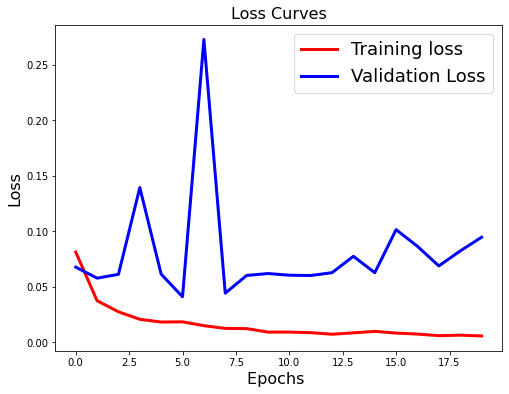

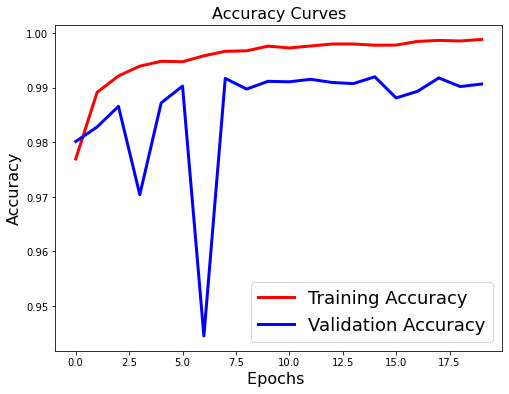

In [47]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

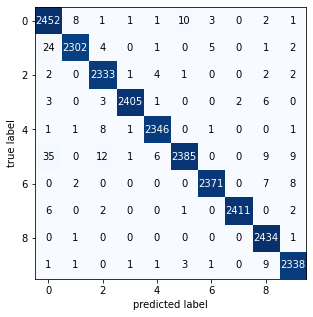

In [48]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [49]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

Accuracy : 0.990625
Classification report                precision    recall  f1-score   support

           0       0.97      0.99      0.98      2479
           1       0.99      0.98      0.99      2339
           2       0.99      0.99      0.99      2345
           3       1.00      0.99      1.00      2420
           4       0.99      0.99      0.99      2359
           5       0.99      0.97      0.98      2457
           6       1.00      0.99      0.99      2388
           7       1.00      1.00      1.00      2422
           8       0.99      1.00      0.99      2436
           9       0.99      0.99      0.99      2355

   micro avg       0.99      0.99      0.99     24000
   macro avg       0.99      0.99      0.99     24000
weighted avg       0.99      0.99      0.99     24000
 samples avg       0.99      0.99      0.99     24000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


x_train shape: (17975, 28, 28, 1)
17975 train samples
12025 test samples
Train on 17975 samples, validate on 12025 samples
Epoch 1/5
17975/17975 [==============================] - 4s 238us/step - loss: 0.1382 - accuracy: 0.9541 - val_loss: 0.0396 - val_accuracy: 0.9867
Epoch 2/5
17975/17975 [==============================] - 4s 227us/step - loss: 0.0379 - accuracy: 0.9888 - val_loss: 0.0298 - val_accuracy: 0.9905
Epoch 3/5
17975/17975 [==============================] - 4s 225us/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.0243 - val_accuracy: 0.9928
Epoch 4/5
17975/17975 [==============================] - 4s 226us/step - loss: 0.0236 - accuracy: 0.9929 - val_loss: 0.0328 - val_accuracy: 0.9904
Epoch 5/5
17975/17975 [==============================] - 4s 226us/step - loss: 0.0210 - accuracy: 0.9934 - val_loss: 0.0229 - val_accuracy: 0.9932
Training time: 0:00:21.353293
Accuracy : 0.9930977130977131
Classification report                precision    recall  f1-score   support

    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train on 18025 samples, validate on 11975 samples
Epoch 1/5
18025/18025 [==============================] - 4s 201us/step - loss: 0.1266 - accuracy: 0.9675 - val_loss: 0.0216 - val_accuracy: 0.9939
Epoch 2/5
18025/18025 [==============================] - 3s 190us/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0162 - val_accuracy: 0.9957
Epoch 3/5
18025/18025 [==============================] - 3s 189us/step - loss: 0.0158 - accuracy: 0.9947 - val_loss: 0.0135 - val_accuracy: 0.9964
Epoch 4/5
18025/18025 [==============================] - 3s 188us/step - loss: 0.0122 - accuracy: 0.9960 - val_loss: 0.0127 - val_accuracy: 0.9964
Epoch 5/5
18025/18025 [==============================] - 3s 188us/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0125 - val_accuracy: 0.9967
Training time: 0:00:17.794004
Accuracy : 0.9967432150313152
Classification report                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2356
           1       1.00

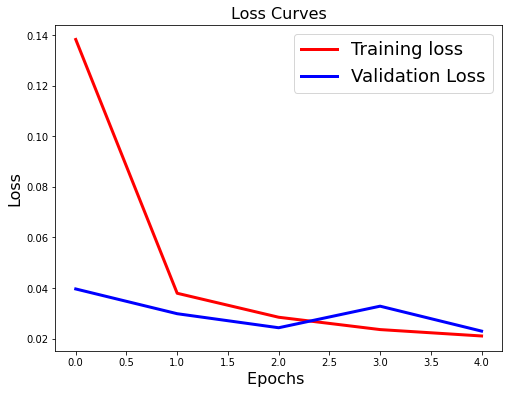

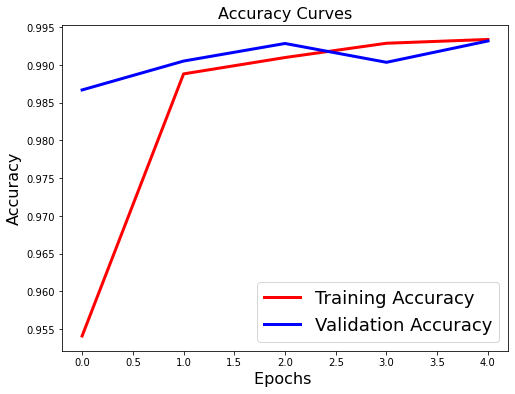

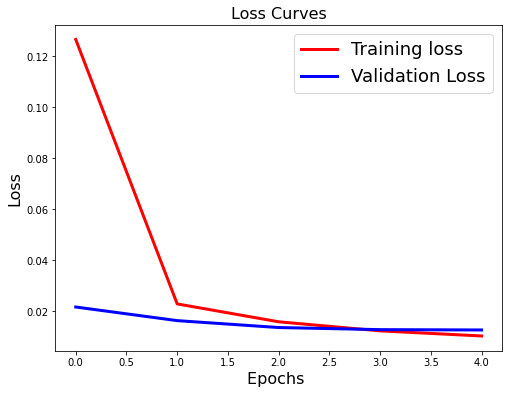

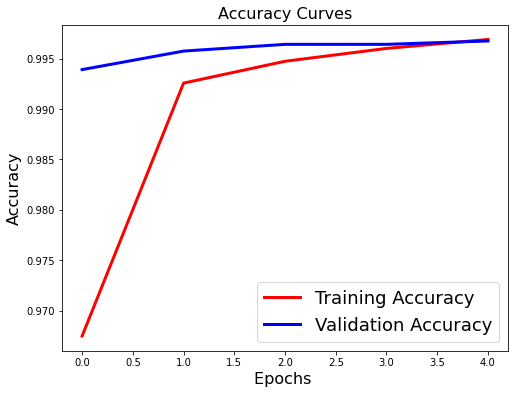

In [92]:
import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

now = datetime.datetime.now
input_shape = (28, 28, 1)
filters = 32
kernel_size = 3
pool_size = 2
num_classes=5
batch_size=32
epochs=5
# create two datasets one with digits below 5 and one with 5 and above
x_train_lt5 = X_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = X_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

x_train_gte5 = X_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5
x_test_gte5 = X_test[y_test >= 5]
y_test_gte5 = y_test[y_test >= 5] - 5

# define two groups of layers: feature (convolutions) and classification (dense)
def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    t = now()
    history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
      # Loss Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)

    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['accuracy'],'r',linewidth=3.0)
    plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    print('Training time: %s' % (now() - t))
    score = model.evaluate(x_test, y_test, verbose=0)
    y_pred=model.predict(x_test)
    y_pred=y_pred>0.50
    acc=accuracy_score(y_test,y_pred)
    print("Accuracy :", acc)
    print("Classification report " , classification_report(y_test,y_pred))
    print('Test score:', score[0])
    print('Test accuracy:', score[1])



feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

# create complete model
model = Sequential(feature_layers + classification_layers)

# train model for 5-digit classification [0..4]
train_model(model,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

# freeze feature layers and rebuild model
for l in feature_layers:
    l.trainable = False

# transfer: train dense layers for new classification task [5..9]
train_model(model,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)